In [3]:
from src.cfg import CFG
from src.cky import CKY

### DEFINE DIFFERENT GRAMMARS

In [4]:
rules = {
    'S': {'AB'},
    'A': {'aAb', ''},
    'B': {'bBc', ''}
}

rules2 = {
    'S': {'AB', 'BC'},
    'A': {'BA', 'a'},
    'B': {'CC', 'b'},
    'C': {'AB', 'a'}
}

prules2 = {
    'S': {('AB', 0.8), ('b', 0.1), ('c', 0.1)},
    'A': {('a', 0.5), ('c', 0.5)},
    'B': {('b', 0.7), ('c', 0.3)},
}

prules = {
    'S': {('AB', 0.9), ('BC', 0.1)},
    'A': {('BA', 0.5), ('a', 0.5)},
    'B': {('CC', 0.7), ('b', 0.3)},
    'C': {('AB', 0.6), ('a', 0.4)}
}
			
cfg = CFG(from_dict=prules, start_symbol='S', probabilistic=True)


Initial rules:
PCFG(
	S -> AB [0.9] | BC [0.1]
	A -> BA [0.5] | a [0.5]
	B -> CC [0.7] | b [0.3]
	C -> AB [0.6] | a [0.4]
)

* Start Symbol: S
* Terminal Symbols: {a, b}
* Non-Terminal Symbols: {S, A, B, C}



### GENERATE ALL WORDS OF LENGTH <= N

In [5]:
generated_words = cfg.generate_words(10, round_probabilities=True)
generated_words

Number of words generated: 545


/Users/rogerbaigess/Desktop/IA/2n/4tQ/PAA/cky-algorithm/src/cfg.py:972: UserWarning: Large values of max_length may take a long time to generate all possible words and consume a lot of memory.
  warnings.warn("Large values of max_length may take a long time to generate all possible words and consume a lot of memory.", UserWarning)


[('ab', 0.135),
 ('aaa', 0.05488),
 ('bab', 0.02295),
 ('aaab', 0.019908),
 ('aaaaa', 0.01241856),
 ('aaba', 0.012348),
 ('ba', 0.012),
 ('baaa', 0.008568),
 ('aabab', 0.0074655),
 ('aaaaab', 0.005179104),
 ('aaaaaaa', 0.00370637568),
 ('aaaaba', 0.003485664),
 ('bbab', 0.0034425),
 ('baaab', 0.003213),
 ('aabaaa', 0.002871792),
 ('aaaabab', 0.0021930048),
 ('ababa', 0.002079),
 ('baaaaa', 0.00197568),
 ('baaba', 0.0019278),
 ('abaab', 0.0019278),
 ('aaaaaaab', 0.001649100096),
 ('abaaaa', 0.001495872),
 ('ababab', 0.00139482),
 ('bbaaa', 0.0012852),
 ('aaaaaaaaa', 0.00126437197824),
 ('aabaaab', 0.0012071052),
 ('baabab', 0.001204875),
 ('aaabaa', 0.001178352),
 ('aaaaaaba', 0.001145301696),
 ('aabbab', 0.001119825),
 ('abaa', 0.001008),
 ('aaababa', 0.0009435636),
 ('baaaaab', 0.0009356256),
 ('aaaabaaa', 0.00092955744),
 ('aaabaab', 0.000896994),
 ('aabaaaaa', 0.00082780992),
 ('aabaaba', 0.000801738),
 ('aaaaaabab', 0.0007398575856),
 ('aaabaaaa', 0.000694253952),
 ('abaaaab', 0.00

### CREATE A CKY CLASS WITH THE GRAMMAR

In [6]:
cky = CKY(cfg)

### PRINT PROBABILITIES AND PATHS OF THE GENERATED WORDS

In [7]:
for word, probability in generated_words:
    parsed_word = cky.parse(word, round_probabilities=True)
    print(f'Word: {word}, Probability: {probability}, Parsed: {parsed_word[0]}, Paths: {parsed_word[2]}\n')

Word: ab, Probability: 0.135, Parsed: True, Paths: [(('S', ('A', 'a', 0.5), ('B', 'b', 0.3)), 0.135)]

Word: aaa, Probability: 0.05488, Parsed: True, Paths: [(('S', ('A', 'a', 0.5), (('B', ('C', 'a', 0.4), ('C', 'a', 0.4)), 0.112)), 0.0504), (('S', (('B', ('C', 'a', 0.4), ('C', 'a', 0.4)), 0.112), ('C', 'a', 0.4)), 0.00448)]

Word: bab, Probability: 0.02295, Parsed: True, Paths: [(('S', ('B', 'b', 0.3), (('C', ('A', 'a', 0.5), ('B', 'b', 0.3)), 0.09)), 0.0027), (('S', (('A', ('B', 'b', 0.3), ('A', 'a', 0.5)), 0.075), ('B', 'b', 0.3)), 0.02025)]

Word: aaab, Probability: 0.019908, Parsed: True, Paths: [(('S', ('A', 'a', 0.5), (('B', ('C', 'a', 0.4), (('C', ('A', 'a', 0.5), ('B', 'b', 0.3)), 0.09)), 0.0252)), 0.01134), (('S', (('B', ('C', 'a', 0.4), ('C', 'a', 0.4)), 0.112), (('C', ('A', 'a', 0.5), ('B', 'b', 0.3)), 0.09)), 0.001008), (('S', (('A', (('B', ('C', 'a', 0.4), ('C', 'a', 0.4)), 0.112), ('A', 'a', 0.5)), 0.028), ('B', 'b', 0.3)), 0.00756)]

Word: aaaaa, Probability: 0.01241856

### CHECK ALL THE PATHS PROBABILITIES ADD UP TO THE PROBABILITY OF THE WORD

In [8]:
for word, probability in generated_words:
    generated_bool, probability, paths = cky.parse(word)
    paths_probabilities = 0
    for path in paths:
        paths_probabilities += path[1]
    assert paths_probabilities == probability

### PLOT ALL CKY PATHS OF THE FIRST WORDS GENERATED

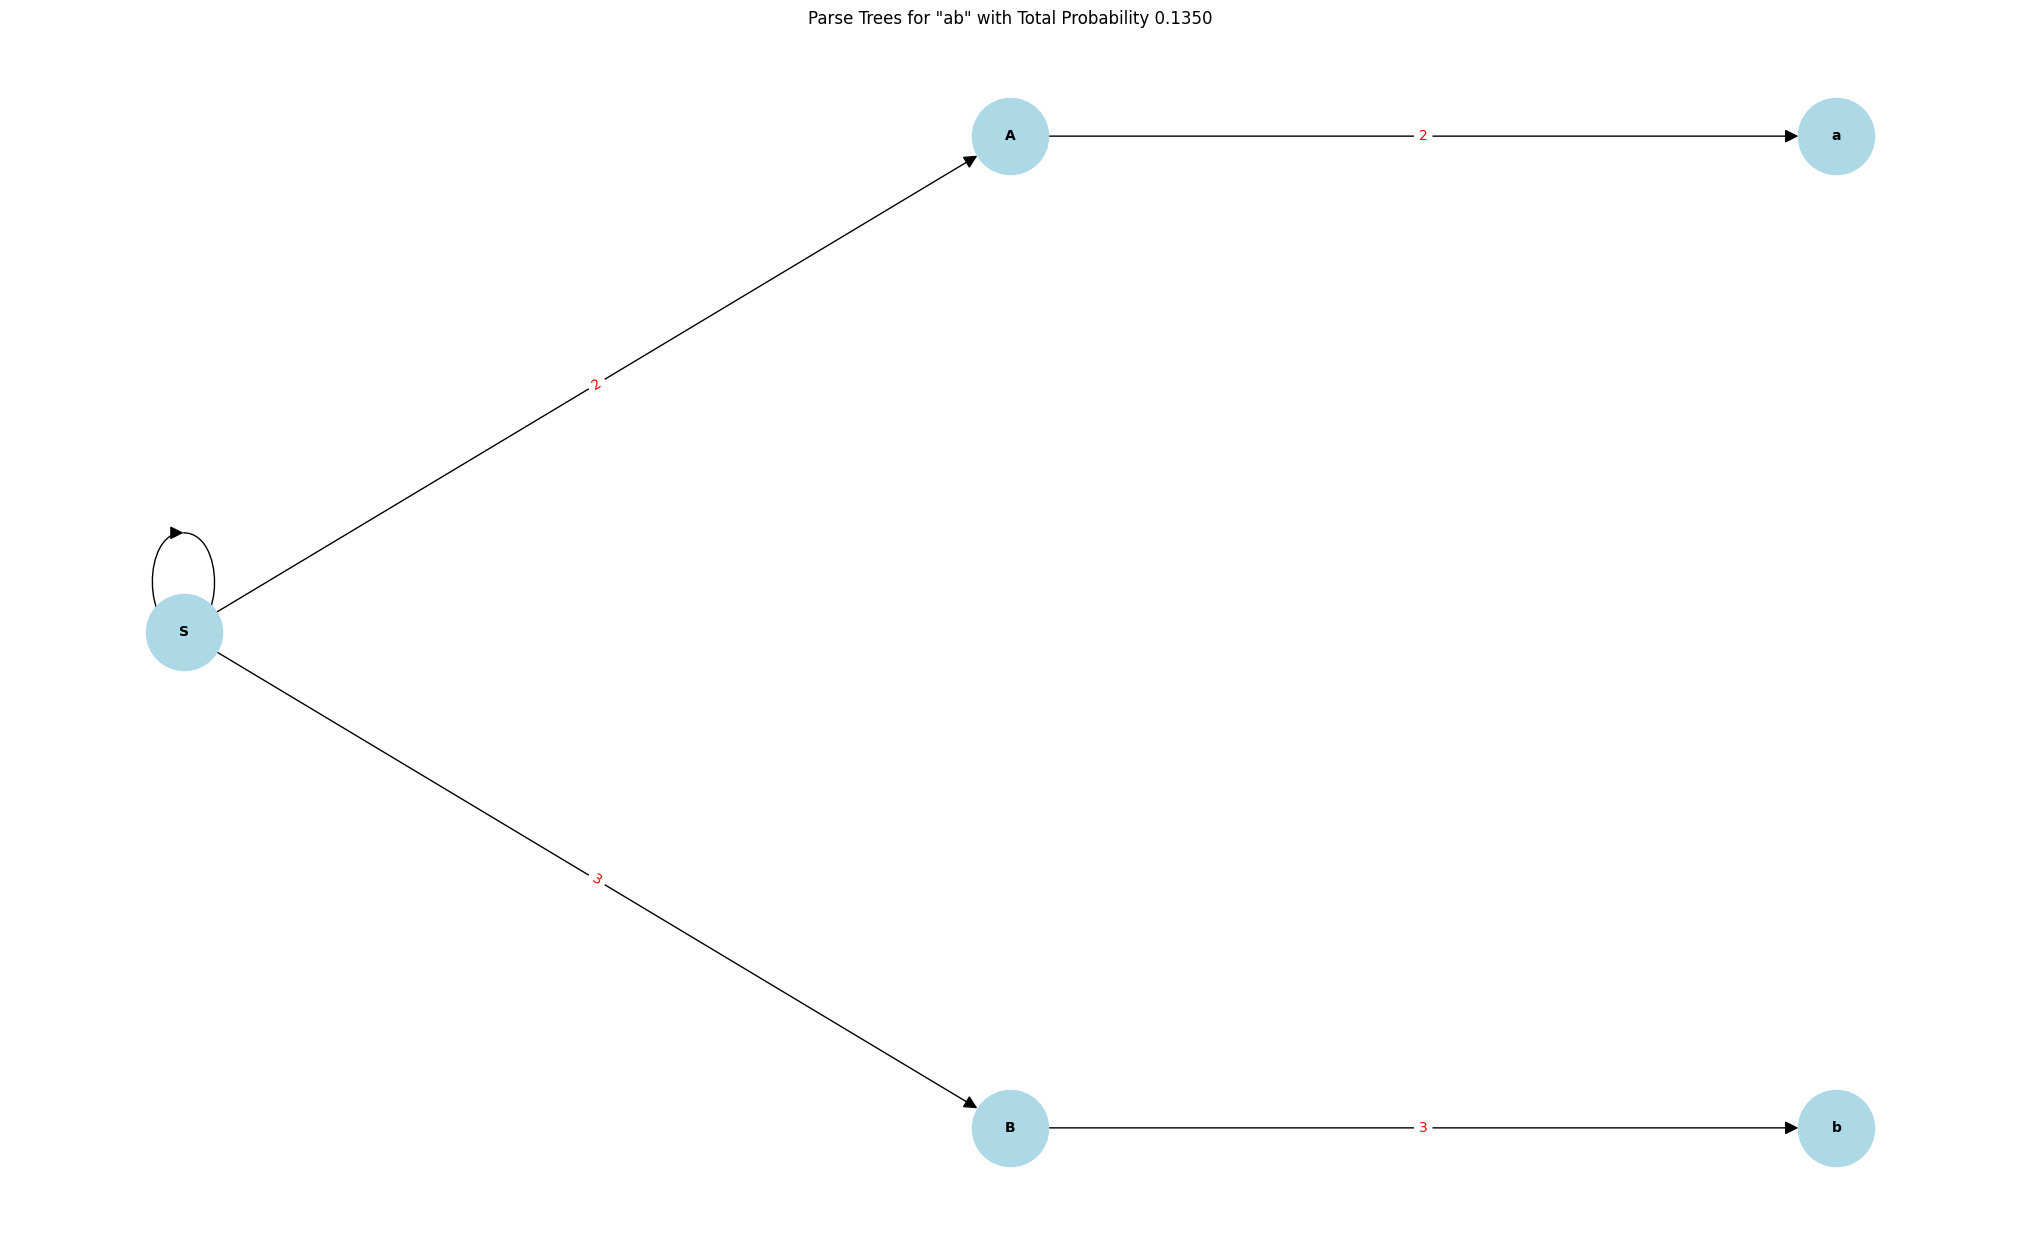

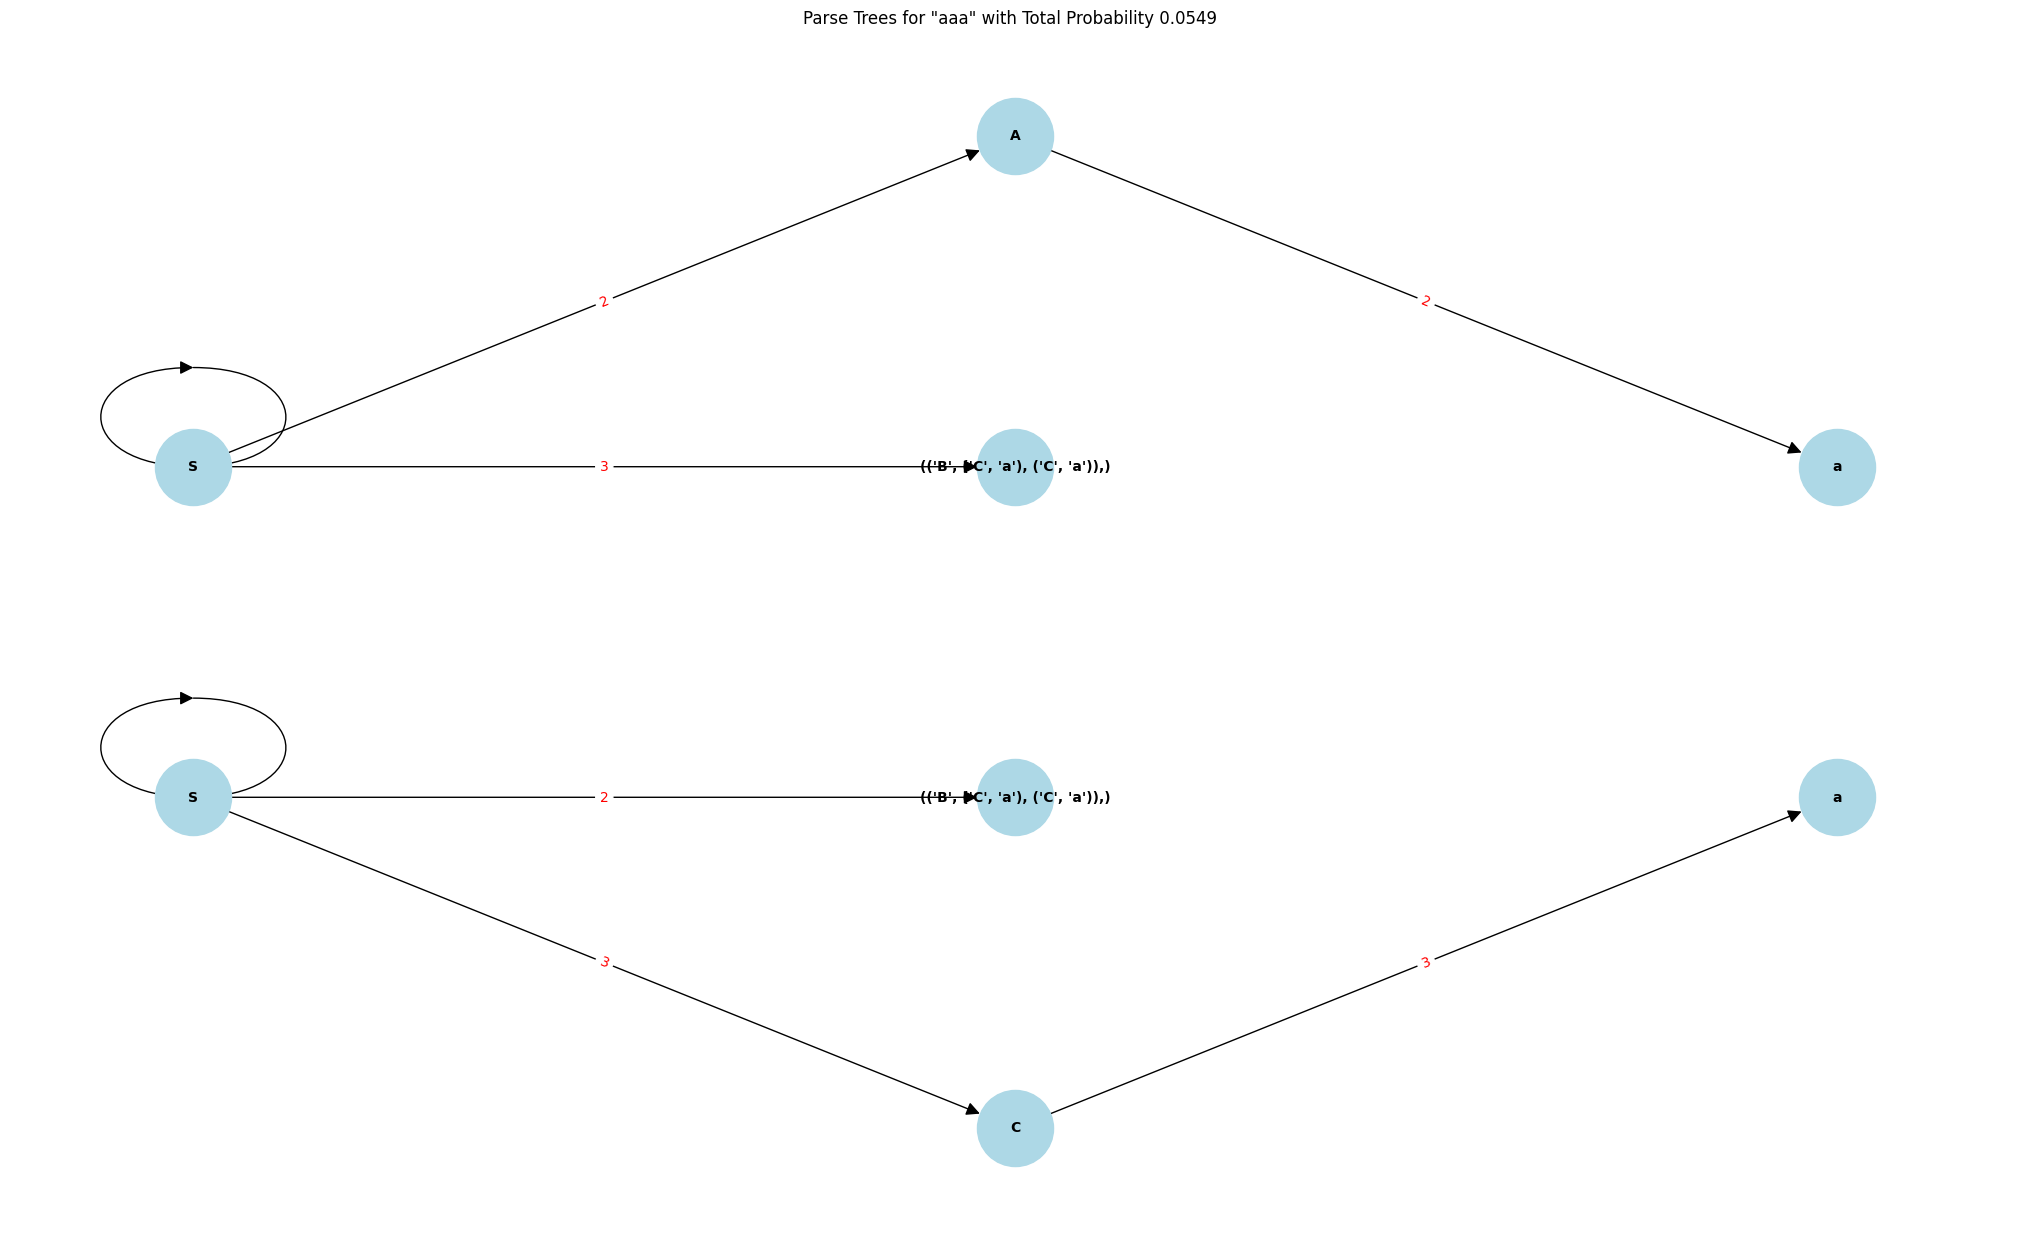

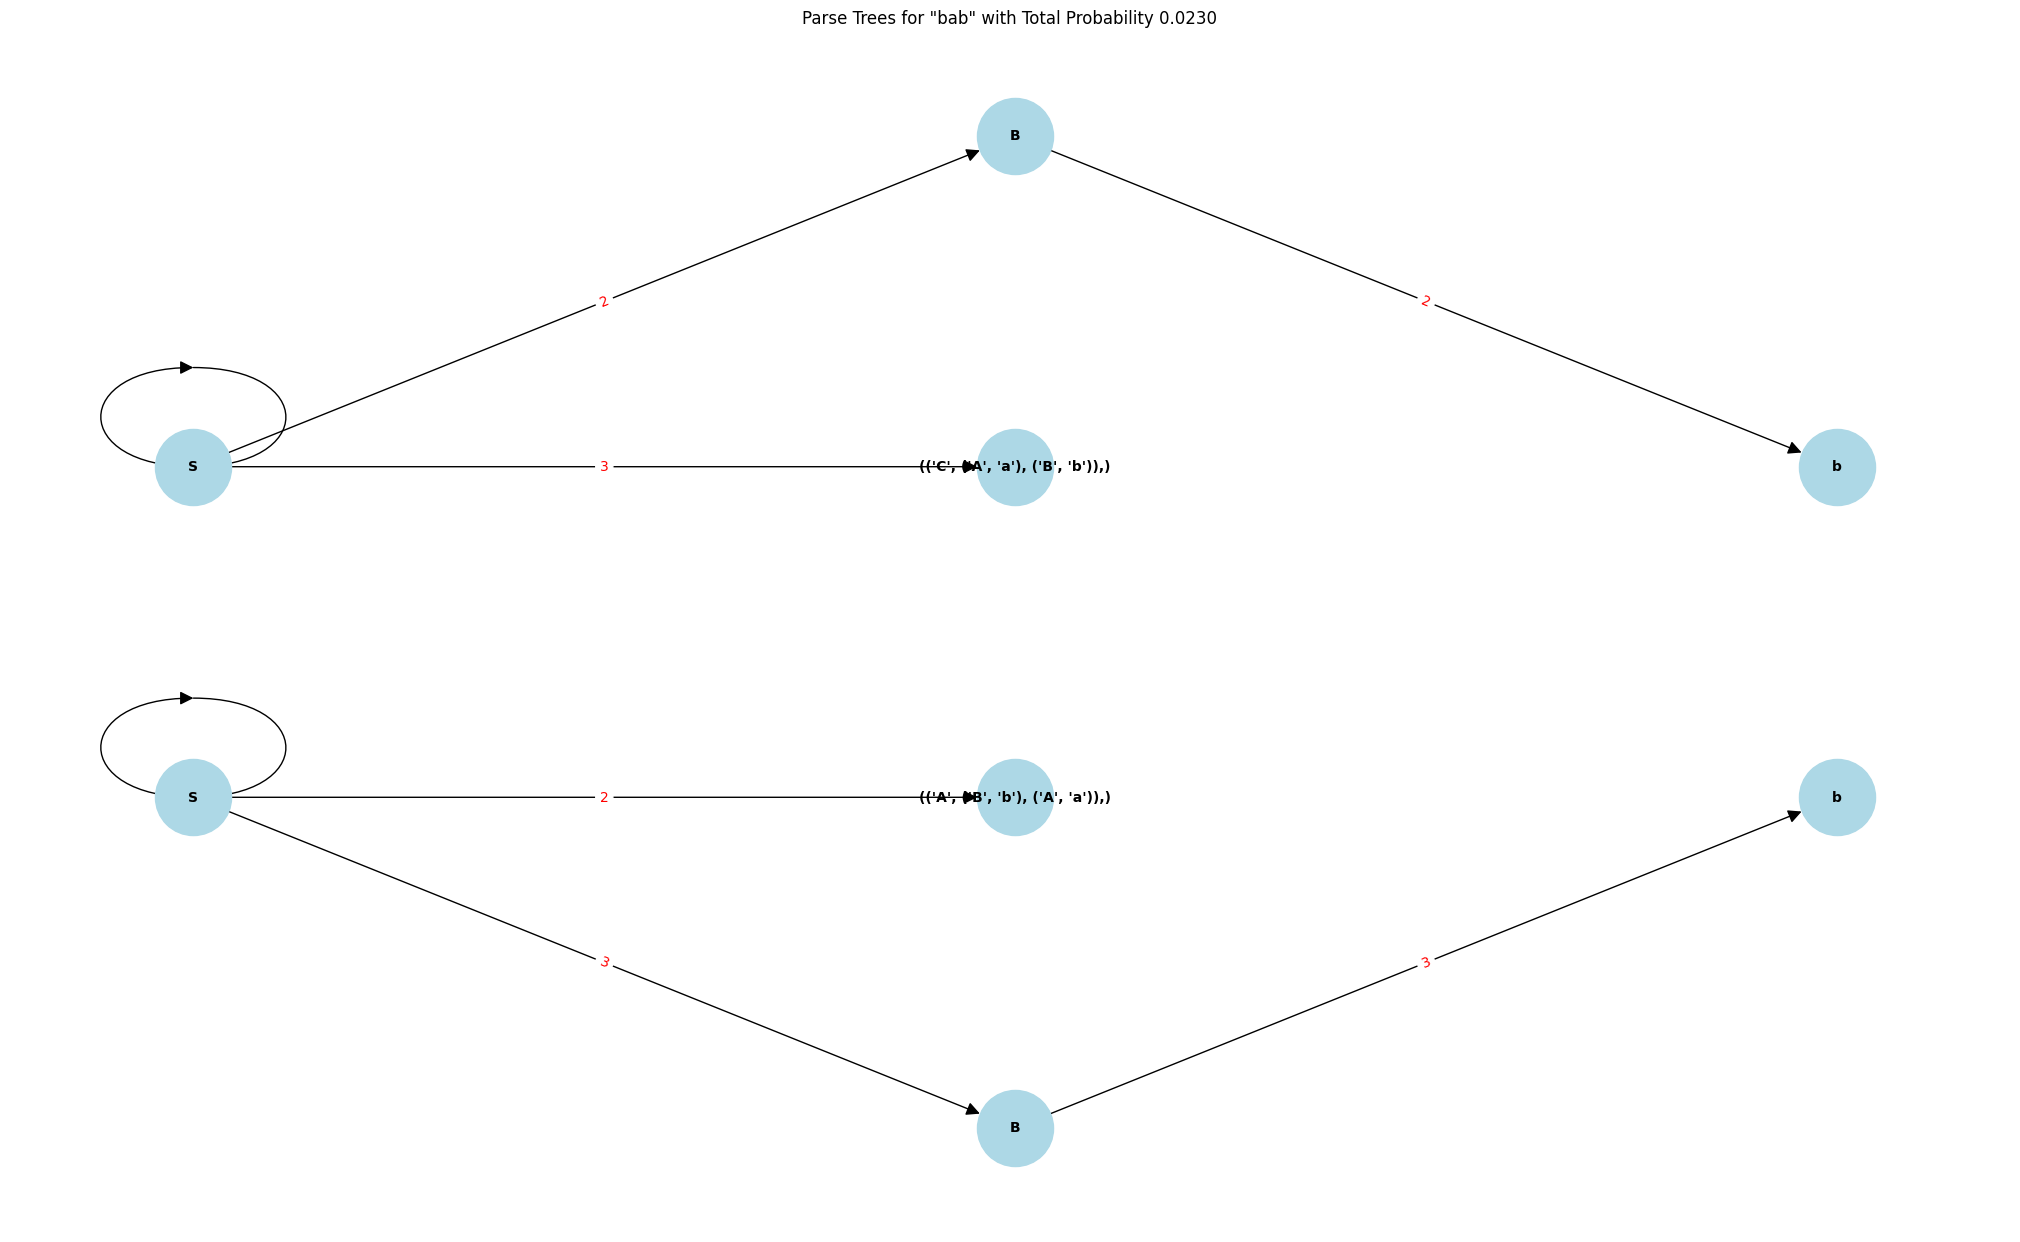

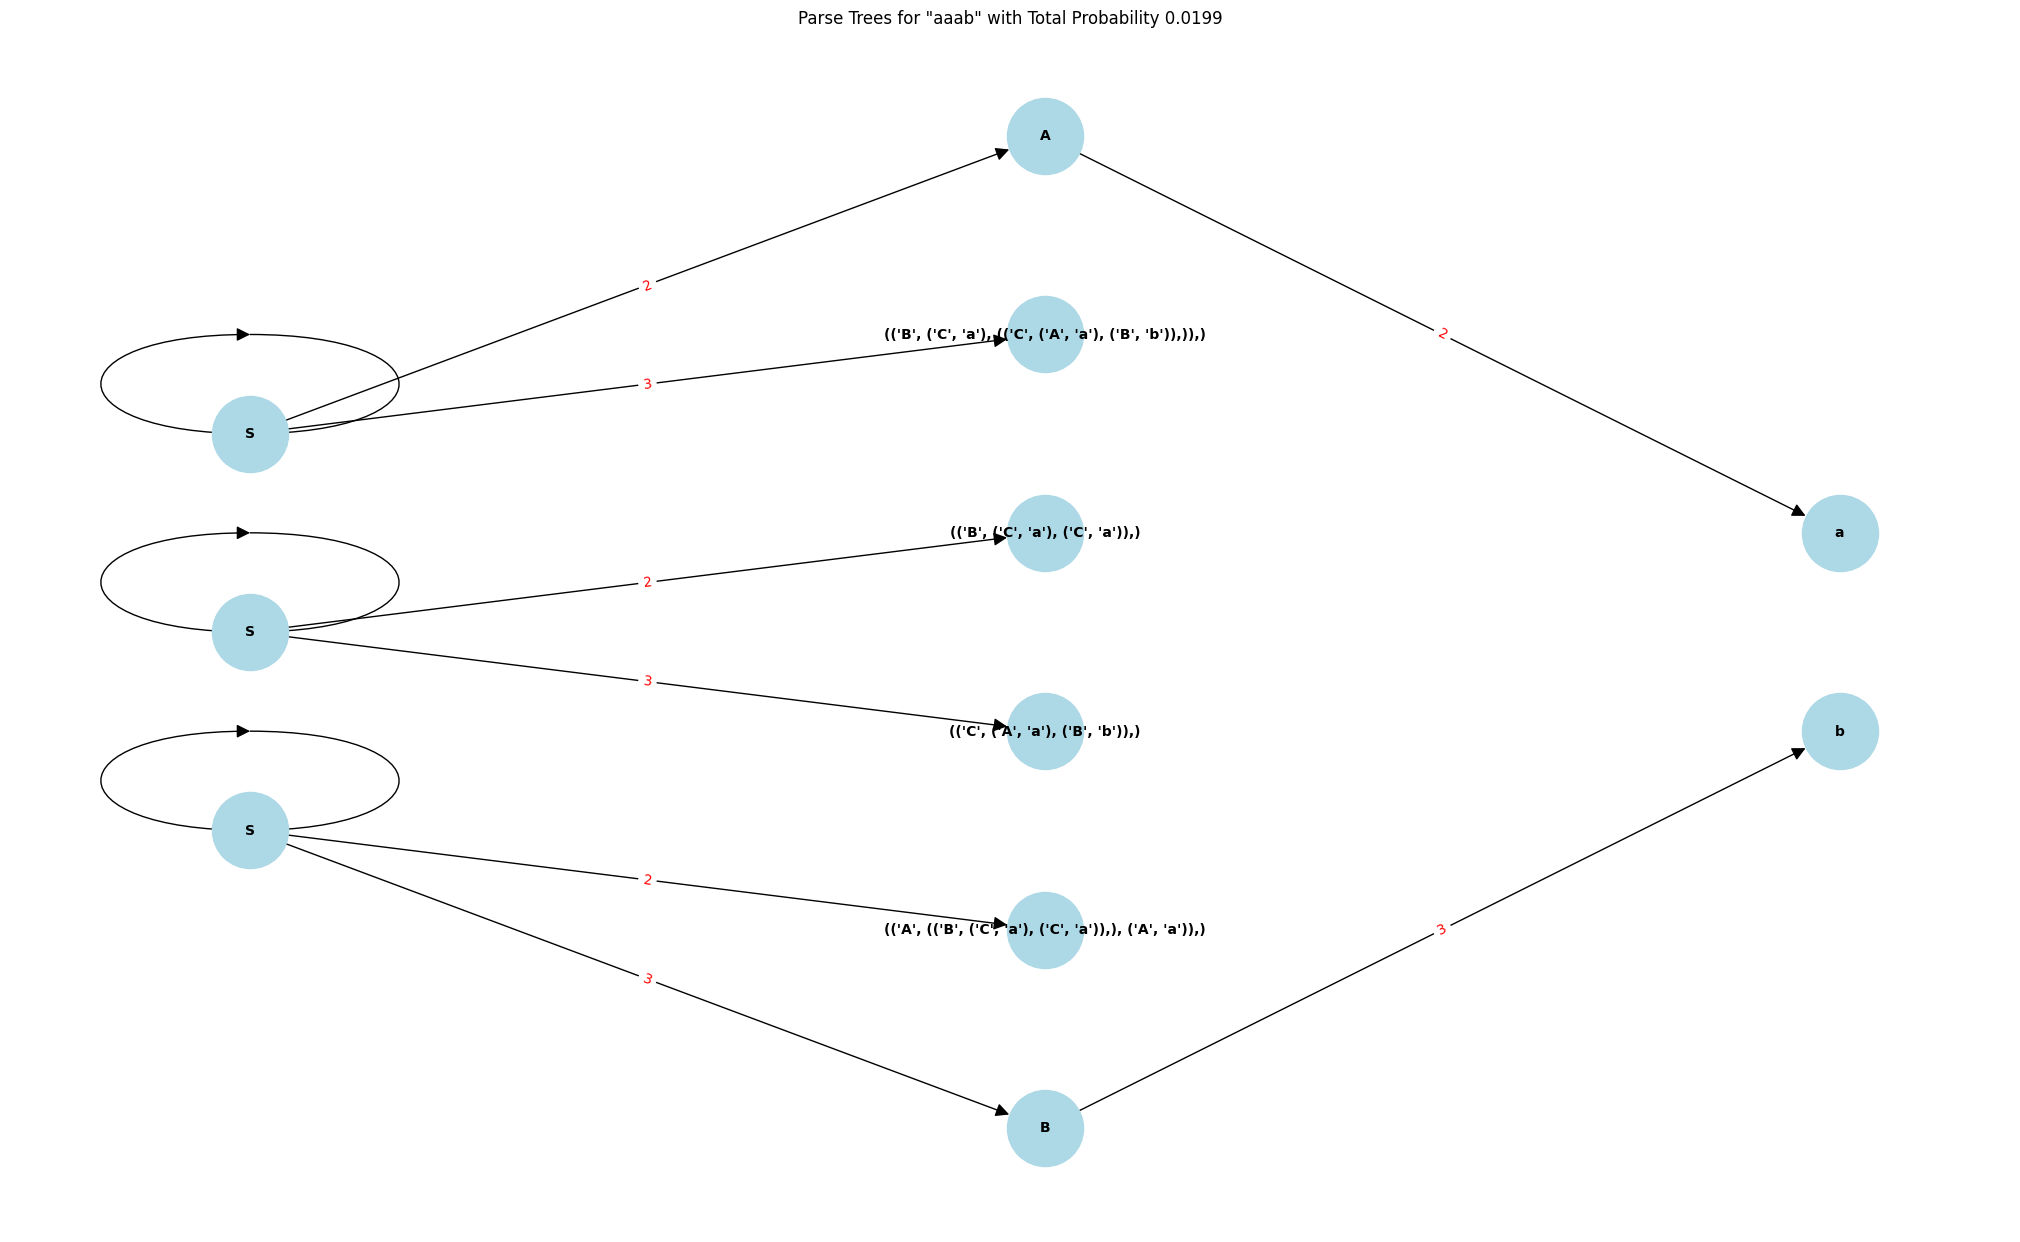

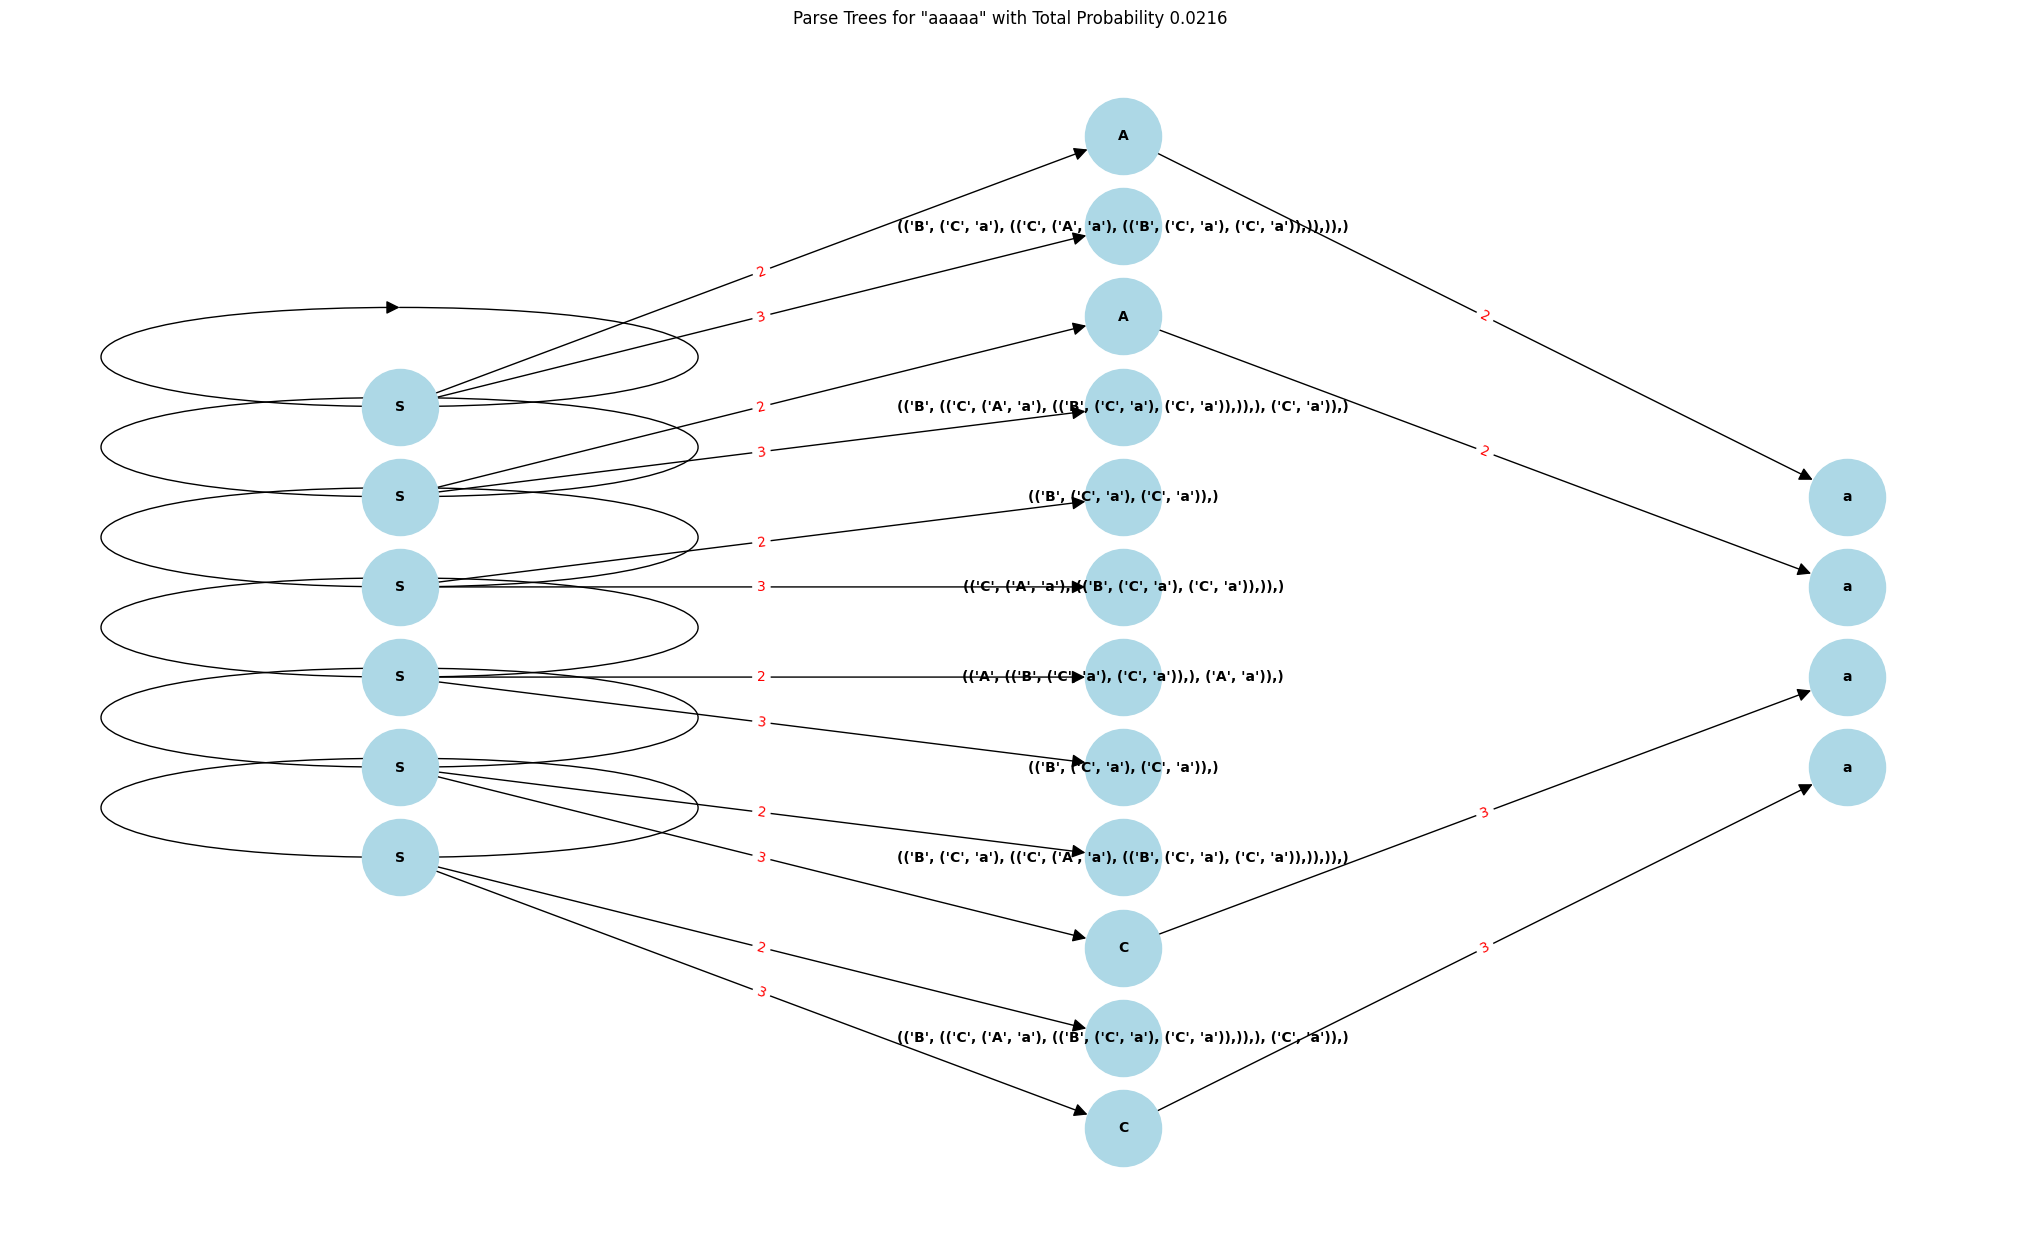

In [9]:
for word, probability in generated_words[:5]:
    generated_bool, probability, paths = cky.parse(word, round_probabilities=True, visualize=True)

### CHECK IF ALL THE GENERATED WORDS ARE DETECTED WITH THE SAME PROBABILITY IN THE CKY CLASS

In [10]:
words = generated_words

results = []
for word in words:
	result = cky.parse(word[0], round_probabilities=True)
	results.append(result)
	if not cfg.is_probabilistic():
		print(f'{word[0]}: {result}')
	else:
		print(f'{word[0]}: {result[0]} [{result[1]}]')

num_trues = sum([result[0] for result in results])
print(f"\nTrue values: {num_trues}\nFalse values: {len(results) - num_trues}")
	

ab: True [0.135]
aaa: True [0.05488]
bab: True [0.02295]
aaab: True [0.019908]
aaaaa: True [0.0216384]
aaba: True [0.012348]
ba: True [0.012]
baaa: True [0.008568]
aabab: True [0.014553]
aaaaab: True [0.013956768]
aaaaaaa: True [0.02039165184]
aaaaba: True [0.009017568]
bbab: True [0.0034425]
baaab: True [0.003591]
aabaaa: True [0.005517792]
aaaabab: True [0.0136713528]
ababa: True [0.002457]
baaaaa: True [0.003697344]
baaba: True [0.0019278]
abaab: True [0.0019278]
aaaaaaab: True [0.016632064512]
abaaaa: True [0.001636992]
ababab: True [0.00326592]
bbaaa: True [0.0012852]
aaaaaaaaa: True [0.02791752800256]
aabaaab: True [0.0038875032]
baabab: True [0.00269325]
aaabaa: True [0.001629936]
aaaaaaba: True [0.010851224832]
aabbab: True [0.00218295]
abaa: True [0.001008]
aaababa: True [0.0044807364]
baaaaab: True [0.0033297264]
aaaabaaa: True [0.006307160832]
aaabaab: True [0.0027846504]
aabaaaaa: True [0.005103971712]
aabaaba: True [0.002071536]
aaaaaabab: True [0.0186657603552]
aaabaaaa: 